In [2]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

In [3]:

topics = ["Artificial Intelligence", "Machine Learning", "Data Science", "Database", "Data Mining"]

results = []
for topic in topics:
    session = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    SEARCH_PARAMS = {
        "action": "query",
        "format": "json",
        "list": "search",
        "srsearch": topic,
        "srlimit": 10
    }
    response = session.get(url=URL, params=SEARCH_PARAMS)
    data = response.json()
    for item in data["query"]["search"]:
        page_title = item["title"]
        page_id = item["pageid"]
        CONTENT_PARAMS = {
            "action": "query",
            "prop": "extracts",
            "exintro": True,
            "explaintext": True,
            "pageids": page_id,
            "format": "json",
        }
        content_response = session.get(url=URL, params=CONTENT_PARAMS)
        content_data = content_response.json()
        page_content = content_data["query"]["pages"][str(page_id)]["extract"]
        page_link = "https://en.wikipedia.org/wiki/" + page_title.replace(" ", "_")
        
        results.append({"Title": page_title, "Content": page_content, "Link": page_link, "Topic": topic})

KeyboardInterrupt: 

In [14]:
df = pd.DataFrame(results)
df.head()

,Title,Content,Link,Topic
0,Artificial intelligence,Artificial intelligence (AI) is the intelligen...,https://en.wikipedia.org/wiki/Artificial_intel...,Artificial Intelligence
1,Artificial general intelligence,An artificial general intelligence (AGI) is a ...,https://en.wikipedia.org/wiki/Artificial_gener...,Artificial Intelligence
2,Generative artificial intelligence,Generative artificial intelligence (generative...,https://en.wikipedia.org/wiki/Generative_artif...,Artificial Intelligence
3,Hallucination (artificial intelligence),"In the field of artificial intelligence (AI), ...",https://en.wikipedia.org/wiki/Hallucination_(a...,Artificial Intelligence
4,A.I. Artificial Intelligence,A.I. Artificial Intelligence (or simply A.I.) ...,https://en.wikipedia.org/wiki/A.I._Artificial_...,Artificial Intelligence


In [15]:
df.shape

(50, 4)

In [16]:
df.to_csv("Scrapped_articles.csv")

In [18]:

total_articles = len(df)
articles_per_topic = df['Topic'].value_counts()

unique_words = {}
stop_words = {}

for topic in df['Topic'].unique():
    corpus = ' '.join(df[df['Topic'] == topic]['Content'].tolist())
    words = corpus.split()
    unique_words_set = set(words)
    stopwords = [word for word in words if word.lower() in ENGLISH_STOP_WORDS]
    unique_words[topic] = len(unique_words_set) / len(words) * 100
    stop_words[topic] = len(stopwords) / len(words) * 100


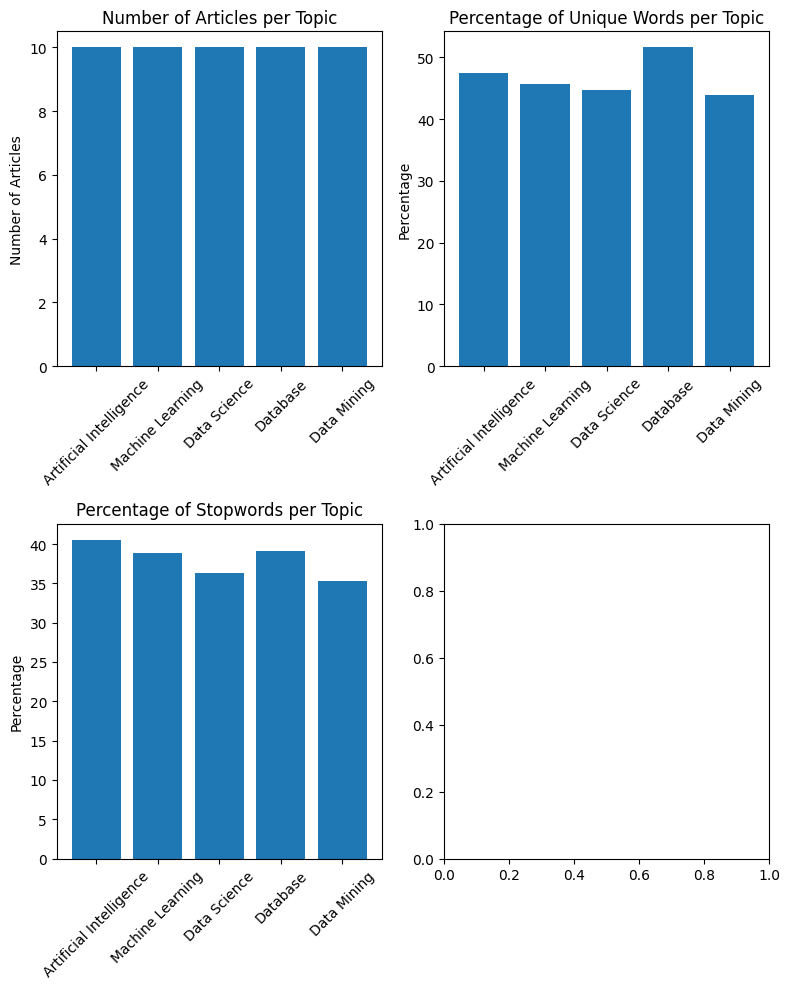

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

axs[0][0].bar(articles_per_topic.index, articles_per_topic.values)
axs[0][0].set_title('Number of Articles per Topic')
axs[0][0].set_ylabel('Number of Articles')
axs[0][0].tick_params(axis='x', rotation=45)

axs[0][1].bar(unique_words.keys(), unique_words.values())
axs[0][1].set_title('Percentage of Unique Words per Topic')
axs[0][1].set_ylabel('Percentage')
axs[0][1].tick_params(axis='x', rotation=45)

axs[1][0].bar(stop_words.keys(), stop_words.values())
axs[1][0].set_title('Percentage of Stopwords per Topic')
axs[1][0].set_ylabel('Percentage')
axs[1][0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [26]:
print(f"Total Articles: {total_articles}")
print(f"Articles/Topic: {articles_per_topic.to_dict()}")
print(f"Unique words/topic (%): {unique_words}")
print(f"Stop Words/topic (%): {stop_words}")

Total Articles: 50
Articles/Topic: {'Artificial Intelligence': 10, 'Machine Learning': 10, 'Data Science': 10, 'Database': 10, 'Data Mining': 10}
Unique words/topic (%): {'Artificial Intelligence': 47.39276703111859, 'Machine Learning': 45.717082721488005, 'Data Science': 44.62409054163298, 'Database': 51.61023947151114, 'Data Mining': 43.916913946587535}
Stop Words/topic (%): {'Artificial Intelligence': 40.53826745164003, 'Machine Learning': 38.86441507586882, 'Data Science': 36.33791430881164, 'Database': 39.058629232039635, 'Data Mining': 35.25222551928783}


In [4]:
df = pd.read_csv("Scrapped_articles.csv")